# pandas란?
---

pandas는 

오늘은 pandas의 대략적인 사용법을 알아보기 위해 pandas 공식 홈페이지의 [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#minutes-to-pandas) 튜토리얼을 보고 학습을 진행해보겠습니다.

우선 필요한 라이브러리를 import 합니다.

In [1]:
import numpy as np
import pandas as pd

# 객체 생성
---

pandas에서 주로 사용되는 Series와 Dataframe을 생성해보겠습니다.

우선 Series는 pd.Series()를 통해 생성합니다.

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

date_range() 함수를 통해 날짜 데이터를 생성하고, DataFrame을 생성해봅시다.

DataFrame의 data는 numpy의 randn 함수를 사용해 랜덤으로 생성하고, index에는 앞에서 생성한 날짜 데이터를 넣어줍니다.

In [3]:
dates = pd.date_range("20230101", periods=6)
dates
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2023-01-01,0.313010,1.158365,0.045124,-1.239763
2023-01-02,0.158278,-1.899362,0.474879,1.255391
2023-01-03,0.696652,0.462704,0.497475,1.675429
2023-01-04,-0.364552,0.989119,-0.107812,0.156562
2023-01-05,1.452317,1.752941,-0.853370,-0.665848
2023-01-06,-1.173977,-1.670750,-0.561100,-0.283637


dictionary 형태의 데이터를 이용해 DataFrame을 생성해봤습니다.

In [4]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


데이터 타입을 확인해보니 각 columns은 서로 다른 타입을 가지고 있는 것을 확인할 수 있습니다.

In [5]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# 데이터 살펴보기
---

head()함수와 tail()함수를 사용해서 데이터의 앞이나 뒷부분을 살펴볼 수 있습니다.

In [6]:
df.head()

,A,B,C,D
2023-01-01,0.313010,1.158365,0.045124,-1.239763
2023-01-02,0.158278,-1.899362,0.474879,1.255391
2023-01-03,0.696652,0.462704,0.497475,1.675429
2023-01-04,-0.364552,0.989119,-0.107812,0.156562
2023-01-05,1.452317,1.752941,-0.853370,-0.665848


In [7]:
df.tail(3)

,A,B,C,D
2023-01-04,-0.364552,0.989119,-0.107812,0.156562
2023-01-05,1.452317,1.752941,-0.853370,-0.665848
2023-01-06,-1.173977,-1.670750,-0.561100,-0.283637


index와 columns를 확인해봅시다.

In [8]:
df.index

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06'],
              dtype='datetime64[ns]', freq='D')

In [9]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

to_numpy() 함수를 통해 DataFrame을 numpy array로 변환할 수 있습니다. 변환한 array에는 index와 columns은 포함되지 않습니다.

numpy array의 데이터 타입은 한 가지로 이루어져 있기 떄문에, 변환하고자 하는 DataFrame의 columns의 데이터 타입이 여러가지라면, 모든 타입을 포함할 수 있는 최적의 데이터 타입으로 변환해줍니다. 그러나, 다중 타입을 가진 Dataframe 변환은 단일 타입의 Dataframe을 변환할 때 보다 더 많은 자원을 소모한다는 단점이 있습니다.

In [10]:
df.to_numpy()

array([[ 0.31301   ,  1.15836467,  0.04512355, -1.2397633 ],
       [ 0.15827772, -1.89936176,  0.47487936,  1.2553906 ],
       [ 0.69665213,  0.46270387,  0.49747519,  1.67542944],
       [-0.36455231,  0.98911919, -0.10781155,  0.15656157],
       [ 1.45231663,  1.75294109, -0.85336978, -0.6658478 ],
       [-1.17397671, -1.67074977, -0.56109956, -0.28363705]])

In [11]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

describe()는 데이터의 간단한 통계 정보를 보여줍니다.

In [12]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.180288,0.132170,-0.084134,0.149689
std,0.898184,1.542805,0.545390,1.125518
min,-1.173977,-1.899362,-0.853370,-1.239763
25%,-0.233845,-1.137386,-0.447778,-0.570295
50%,0.235644,0.725912,-0.031344,-0.063538
75%,0.600742,1.116053,0.367440,0.980683
max,1.452317,1.752941,0.497475,1.675429


데이터의 row와 columns을 바꾸는 방법입니다.

In [13]:
df.T # == df.transpose()

,2023-01-01,2023-01-02,2023-01-03,2023-01-04,2023-01-05,2023-01-06
A,0.313010,0.158278,0.696652,-0.364552,1.452317,-1.173977
B,1.158365,-1.899362,0.462704,0.989119,1.752941,-1.670750
C,0.045124,0.474879,0.497475,-0.107812,-0.853370,-0.561100
D,-1.239763,1.255391,1.675429,0.156562,-0.665848,-0.283637


DataFrame.sort_index()로 axis를 기준으로 데이터를 정렬할 수 있습니다.

axis가 0이면 row를, 1이면 column을 기준으로 변경해줍니다.

ascending은 오름차순으로 정렬하는 인자입니다.

In [14]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2023-01-01,-1.239763,0.045124,1.158365,0.313010
2023-01-02,1.255391,0.474879,-1.899362,0.158278
2023-01-03,1.675429,0.497475,0.462704,0.696652
2023-01-04,0.156562,-0.107812,0.989119,-0.364552
2023-01-05,-0.665848,-0.853370,1.752941,1.452317
2023-01-06,-0.283637,-0.561100,-1.670750,-1.173977


DataFrame.sort_values()는 값을 기준으로 정렬합니다.

In [15]:
df.sort_values(by="B")

,A,B,C,D
2023-01-02,0.158278,-1.899362,0.474879,1.255391
2023-01-06,-1.173977,-1.670750,-0.561100,-0.283637
2023-01-03,0.696652,0.462704,0.497475,1.675429
2023-01-04,-0.364552,0.989119,-0.107812,0.156562
2023-01-01,0.313010,1.158365,0.045124,-1.239763
2023-01-05,1.452317,1.752941,-0.853370,-0.665848


# 데이터 indexing
---

pandas에서 특정 데이터를 select할 때는 DataFrame.at(), DataFrame.iat(), DataFrame.loc(), DataFrame.iloc()를 통해 가져오는 것을 추천한다고 합니다.

at()과 iat()는 단일 값(스칼라)을 제외한 값들은 가져오지 못하지만, 단일 값을 가져올때는 더 빠른 속도를 가지고 있습니다.

## 가져오기
---

A열의 데이터를 Series형태로 가져옵니다.

In [16]:
df["A"]

2023-01-01    0.313010
2023-01-02    0.158278
2023-01-03    0.696652
2023-01-04   -0.364552
2023-01-05    1.452317
2023-01-06   -1.173977
Freq: D, Name: A, dtype: float64

데이터를 슬라이싱 하는 방법도 가능합니다.

In [17]:
df[0:3]

,A,B,C,D
2023-01-01,0.313010,1.158365,0.045124,-1.239763
2023-01-02,0.158278,-1.899362,0.474879,1.255391
2023-01-03,0.696652,0.462704,0.497475,1.675429


In [18]:
df["20230102":"20230104"]

,A,B,C,D
2023-01-02,0.158278,-1.899362,0.474879,1.255391
2023-01-03,0.696652,0.462704,0.497475,1.675429
2023-01-04,-0.364552,0.989119,-0.107812,0.156562


## label로 가져오기
---

loc를 사용해 label로 데이터를 가져올 수 있습니다.

In [19]:
df.loc[dates[0]]

A    0.313010
B    1.158365
C    0.045124
D   -1.239763
Name: 2023-01-01 00:00:00, dtype: float64

df.loc는 loc[행 조건, 열 조건]의 형태로 데이터를 가져옵니다. 슬라이싱도 가능하고, 원하는 부분을 리스트 형태로 묶어 가져오는 것도 가능합니다.

이때 주의할 점은, loc를 사용하여 슬라이싱 할 때는 지정한 모든 범위가 포함됩니다.(범위의 맨 끝을 자르지 않음)

In [20]:
df.loc[:, ["A", "B"]]

,A,B
2023-01-01,0.313010,1.158365
2023-01-02,0.158278,-1.899362
2023-01-03,0.696652,0.462704
2023-01-04,-0.364552,0.989119
2023-01-05,1.452317,1.752941
2023-01-06,-1.173977,-1.670750


In [21]:
df.loc["20230102":"20230104", ["A", "B"]]

,A,B
2023-01-02,0.158278,-1.899362
2023-01-03,0.696652,0.462704
2023-01-04,-0.364552,0.989119


In [22]:
df.loc["20230102", ["A", "B"]]

A    0.158278
B   -1.899362
Name: 2023-01-02 00:00:00, dtype: float64

scalar 값을 가져올때는 at()도 사용 가능합니다.

In [23]:
df.loc[dates[0], "A"]

0.31300999859938

In [24]:
df.at[dates[0], "A"]

0.31300999859938

## index로 가져오기
---

데이터의 index로 값을 가져오고 싶을때는 iloc를 사용하면 됩니다.

In [25]:
df.iloc[3]

A   -0.364552
B    0.989119
C   -0.107812
D    0.156562
Name: 2023-01-04 00:00:00, dtype: float64

In [26]:
df.iloc[3:5, 0:2]

,A,B
2023-01-04,-0.364552,0.989119
2023-01-05,1.452317,1.752941


In [27]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2023-01-02,0.158278,0.474879
2023-01-03,0.696652,0.497475
2023-01-05,1.452317,-0.853370


In [28]:
df.iloc[1:3, :]

,A,B,C,D
2023-01-02,0.158278,-1.899362,0.474879,1.255391
2023-01-03,0.696652,0.462704,0.497475,1.675429


In [29]:
df.iloc[:, 1:3]

,B,C
2023-01-01,1.158365,0.045124
2023-01-02,-1.899362,0.474879
2023-01-03,0.462704,0.497475
2023-01-04,0.989119,-0.107812
2023-01-05,1.752941,-0.853370
2023-01-06,-1.670750,-0.561100


scalar 값을 가져올때는, iat도 사용 가능합니다.

In [30]:
df.iloc[1, 1]

-1.8993617569029617

In [31]:
df.iat[1, 1]

-1.8993617569029617

## 조건을 지정한 indexing
---

데이터를 가져올때, 특정 조건을 지정해줘서 가져오는 방법도 있습니다. 이것을 마스크를 지정한다고 표현합니다.

A 열의 값이 0보다 큰 row를 찾고, 해당하는 row의 전체를 반환합니다.

In [32]:
mask = df["A"] > 0
df[mask]

,A,B,C,D
2023-01-01,0.313010,1.158365,0.045124,-1.239763
2023-01-02,0.158278,-1.899362,0.474879,1.255391
2023-01-03,0.696652,0.462704,0.497475,1.675429
2023-01-05,1.452317,1.752941,-0.853370,-0.665848


0보다 큰 값들로 마스크를 만들고, df 전체에 적용해 표시합니다.

In [33]:
df[df > 0]

,A,B,C,D
2023-01-01,0.313010,1.158365,0.045124,NaN
2023-01-02,0.158278,NaN,0.474879,1.255391
2023-01-03,0.696652,0.462704,0.497475,1.675429
2023-01-04,NaN,0.989119,NaN,0.156562
2023-01-05,1.452317,1.752941,NaN,NaN
2023-01-06,NaN,NaN,NaN,NaN


isin()을 사용하여 마스킹합니다.

isin()은 문자 그대로 인자로 들어오는 인수가 데이터 안에 들어있는지 확인해주는 함수입니다.

In [34]:
df2 = df.copy() # 깊은 복사
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2023-01-01,0.313010,1.158365,0.045124,-1.239763,one
2023-01-02,0.158278,-1.899362,0.474879,1.255391,one
2023-01-03,0.696652,0.462704,0.497475,1.675429,two
2023-01-04,-0.364552,0.989119,-0.107812,0.156562,three
2023-01-05,1.452317,1.752941,-0.853370,-0.665848,four
2023-01-06,-1.173977,-1.670750,-0.561100,-0.283637,three


In [35]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2023-01-03,0.696652,0.462704,0.497475,1.675429,two
2023-01-05,1.452317,1.752941,-0.853370,-0.665848,four


## 데이터 수정
---

새 열을 추가하면, 기존 데이터의 인덱스에 맞게 자동으로 데이터가 추가됩니다.

In [36]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20230102", periods=6))
s1

2023-01-02    1
2023-01-03    2
2023-01-04    3
2023-01-05    4
2023-01-06    5
2023-01-07    6
Freq: D, dtype: int64

In [37]:
df["F"] = s1

데이터의 특정 부분만 변경하는 것도 가능합니다.

In [38]:
df.at[dates[0], "A"] = 0

In [39]:
df.iat[0, 1] = 0

In [40]:
df.loc[:, "D"] = np.array([5] * len(df))

C:\Users\sunse\AppData\Local\Temp\ipykernel_16412\2422562958.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "D"] = np.array([5] * len(df))


In [41]:
df

,A,B,C,D,F
2023-01-01,0.000000,0.000000,0.045124,5,NaN
2023-01-02,0.158278,-1.899362,0.474879,5,1.0
2023-01-03,0.696652,0.462704,0.497475,5,2.0
2023-01-04,-0.364552,0.989119,-0.107812,5,3.0
2023-01-05,1.452317,1.752941,-0.853370,5,4.0
2023-01-06,-1.173977,-1.670750,-0.561100,5,5.0


0보다 큰 값들만 음수로 변경합니다.

In [42]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2023-01-01,0.000000,0.000000,-0.045124,-5,NaN
2023-01-02,-0.158278,-1.899362,-0.474879,-5,-1.0
2023-01-03,-0.696652,-0.462704,-0.497475,-5,-2.0
2023-01-04,-0.364552,-0.989119,-0.107812,-5,-3.0
2023-01-05,-1.452317,-1.752941,-0.853370,-5,-4.0
2023-01-06,-1.173977,-1.670750,-0.561100,-5,-5.0


# 누락된 데이터
---

reindex()를 사용하여 index와 columns를 추가/변경/삭제 할 수 있습니다.

In [43]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1
df1

,A,B,C,D,F,E
2023-01-01,0.000000,0.000000,0.045124,5,NaN,1.0
2023-01-02,0.158278,-1.899362,0.474879,5,1.0,1.0
2023-01-03,0.696652,0.462704,0.497475,5,2.0,NaN
2023-01-04,-0.364552,0.989119,-0.107812,5,3.0,NaN


dropna()는 누락된 데이터가 있는 모든 row를 삭제합니다.

In [44]:
df1.dropna(how="any")

,A,B,C,D,F,E
2023-01-02,0.158278,-1.899362,0.474879,5,1.0,1.0


누락된 데이터를 특정 값으로 채워넣을 수 있습니다.

In [45]:
df1.fillna(value=5)

,A,B,C,D,F,E
2023-01-01,0.000000,0.000000,0.045124,5,5.0,1.0
2023-01-02,0.158278,-1.899362,0.474879,5,1.0,1.0
2023-01-03,0.696652,0.462704,0.497475,5,2.0,5.0
2023-01-04,-0.364552,0.989119,-0.107812,5,3.0,5.0


누락된 값이 있으면 True를 반환합니다.

In [46]:
pd.isna(df1)

,A,B,C,D,F,E
2023-01-01,False,False,False,False,True,False
2023-01-02,False,False,False,False,False,False
2023-01-03,False,False,False,False,False,True
2023-01-04,False,False,False,False,False,True


# 작업
---

## 통계
---

일반적으로 누락된 데이터(nan)는 제외되고 계산됩니다.

mean()으로 각 column의 평균 계산.

In [47]:
df.mean()

A    0.128120
B   -0.060891
C   -0.084134
D    5.000000
F    3.000000
dtype: float64

rows의 평균을 계산합니다.

In [48]:
df.mean(axis=1)

2023-01-01    1.261281
2023-01-02    0.946759
2023-01-03    1.731366
2023-01-04    1.703351
2023-01-05    2.270378
2023-01-06    1.318835
Freq: D, dtype: float64

sub()으로 뺄샘을 수행할 수 있습니다. 계산할 수 없는 부분은 NaN을 반환합니다.

In [49]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2023-01-01    NaN
2023-01-02    NaN
2023-01-03    1.0
2023-01-04    3.0
2023-01-05    5.0
2023-01-06    NaN
Freq: D, dtype: float64

In [50]:
df.sub(s, axis="index")

,A,B,C,D,F
2023-01-01,NaN,NaN,NaN,NaN,NaN
2023-01-02,NaN,NaN,NaN,NaN,NaN
2023-01-03,-0.303348,-0.537296,-0.502525,4.0,1.0
2023-01-04,-3.364552,-2.010881,-3.107812,2.0,0.0
2023-01-05,-3.547683,-3.247059,-5.853370,0.0,-1.0
2023-01-06,NaN,NaN,NaN,NaN,NaN


## apply
---

apply()는 사용자가 정의한 함수를 데이터에 적용시킵니다.

In [51]:
df.apply(np.cumsum)

,A,B,C,D,F
2023-01-01,0.000000,0.000000,0.045124,5,NaN
2023-01-02,0.158278,-1.899362,0.520003,10,1.0
2023-01-03,0.854930,-1.436658,1.017478,15,3.0
2023-01-04,0.490378,-0.447539,0.909667,20,6.0
2023-01-05,1.942694,1.305402,0.056297,25,10.0
2023-01-06,0.768717,-0.365347,-0.504803,30,15.0


In [52]:
df.apply(lambda x: x.max() - x.min())

A    2.626293
B    3.652303
C    1.350845
D    0.000000
F    4.000000
dtype: float64

## 히스토그램
---

value_count()로 각 변수가 몇 개씩 있는지 확인할 수 있습니다.

In [53]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    2
1    1
2    3
3    2
4    1
5    5
6    2
7    6
8    0
9    2
dtype: int32

In [54]:
s.value_counts()

2    4
1    2
3    1
5    1
6    1
0    1
dtype: int64

## 문자열 함수
---

아래처럼 Series의 요소들에 쉬운 문자열 처리가 가능합니다.

In [55]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# 데이터 합치기
---

## Concat
---



In [56]:
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,0.341426,-0.582276,0.631420,-0.309297
1,-0.279920,1.026552,0.042808,1.132480
2,0.441273,-0.320651,0.933726,-0.070977
3,0.214011,0.062324,0.847514,-0.334316
4,1.725421,-0.896359,0.707890,-1.767297
5,-0.911509,-0.510395,1.182940,-0.157622
6,0.226714,2.130139,-0.854025,1.868418
7,2.896190,0.146292,-0.541342,-1.563352
8,-0.521714,-1.671618,-0.303765,-0.261245
9,-2.052759,-1.395355,0.398302,-0.267305


In [59]:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  0.341426 -0.582276  0.631420 -0.309297
 1 -0.279920  1.026552  0.042808  1.132480
 2  0.441273 -0.320651  0.933726 -0.070977,
           0         1         2         3
 3  0.214011  0.062324  0.847514 -0.334316
 4  1.725421 -0.896359  0.707890 -1.767297
 5 -0.911509 -0.510395  1.182940 -0.157622
 6  0.226714  2.130139 -0.854025  1.868418,
           0         1         2         3
 7  2.896190  0.146292 -0.541342 -1.563352
 8 -0.521714 -1.671618 -0.303765 -0.261245
 9 -2.052759 -1.395355  0.398302 -0.267305]

In [60]:
pd.concat(pieces)

,0,1,2,3
0,0.341426,-0.582276,0.631420,-0.309297
1,-0.279920,1.026552,0.042808,1.132480
2,0.441273,-0.320651,0.933726,-0.070977
3,0.214011,0.062324,0.847514,-0.334316
4,1.725421,-0.896359,0.707890,-1.767297
5,-0.911509,-0.510395,1.182940,-0.157622
6,0.226714,2.130139,-0.854025,1.868418
7,2.896190,0.146292,-0.541342,-1.563352
8,-0.521714,-1.671618,-0.303765,-0.261245
9,-2.052759,-1.395355,0.398302,-0.267305


## Join
---

merge()를 사용하면 특정 열을 기준으로 데이터를 합칠 수 있습니다.

In [69]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
display(left)
display(right)
pd.merge(left, right, on="key")

,key,lval
0,foo,1
1,foo,2


,key,rval
0,foo,4
1,foo,5


,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [70]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
display(left)
display(right)
pd.merge(left, right, on="key")

,key,lval
0,foo,1
1,bar,2


,key,rval
0,foo,4
1,bar,5


,key,lval,rval
0,foo,1,4
1,bar,2,5


# Grouping
---



In [71]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,1.439276,0.181542
1,bar,one,-0.595553,0.192489
2,foo,two,1.418384,-0.899736
3,bar,three,2.736185,-0.110906
4,foo,two,-0.426330,1.166538
5,bar,two,-0.024930,1.261012
6,foo,one,0.189424,-0.425637
7,foo,three,-1.584320,-1.207487


In [72]:
df.groupby("A")[["C", "D"]].sum()

,C,D
A,,
bar,2.115702,1.342595
foo,1.036433,-1.184781


In [79]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -0.595553  0.192489
    three  2.736185 -0.110906
    two   -0.024930  1.261012
foo one    1.628699 -0.244095
    three -1.584320 -1.207487
    two    0.992054  0.266802

# Reshaping
---

## Stack

In [80]:
tuples = list(
    zip(
        ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
        ["one", "two", "one", "two", "one", "two", "one", "two"],
    )
)
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.679766 -1.353275
      two     0.174517 -0.249298
baz   one     0.338686  1.833684
      two     1.065813 -1.210020

In [81]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.679766
               B   -1.353275
       two     A    0.174517
               B   -0.249298
baz    one     A    0.338686
               B    1.833684
       two     A    1.065813
               B   -1.210020
dtype: float64

In [83]:
display(stacked.unstack())
display(stacked.unstack(1))
display(stacked.unstack(0))

A         B
first second                    
bar   one    -0.679766 -1.353275
      two     0.174517 -0.249298
baz   one     0.338686  1.833684
      two     1.065813 -1.210020

second        one       two
first                      
bar   A -0.679766  0.174517
      B -1.353275 -0.249298
baz   A  0.338686  1.065813
      B  1.833684 -1.210020

first          bar       baz
second                      
one    A -0.679766  0.338686
       B -1.353275  1.833684
two    A  0.174517  1.065813
       B -0.249298 -1.210020

## Pivot tables
---

In [84]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,-0.620343,-0.705042
1,one,B,foo,1.043966,0.117096
2,two,C,foo,0.514842,-0.186353
3,three,A,bar,-1.768777,-1.095362
4,one,B,bar,-0.120225,-0.898146
5,one,C,bar,-1.649564,0.205751
6,two,A,foo,-1.190260,-2.430537
7,three,B,foo,0.763572,-1.103830
8,one,C,foo,-0.262424,0.626863
9,one,A,bar,0.389413,-0.770106


In [85]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  0.389413 -0.620343
      B -0.120225  1.043966
      C -1.649564 -0.262424
three A -1.768777       NaN
      B       NaN  0.763572
      C -0.960538       NaN
two   A       NaN -1.190260
      B  0.308188       NaN
      C       NaN  0.514842

# Time series
---

In [88]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample("1Min").sum()

2012-01-01 00:00:00    14964
2012-01-01 00:01:00     9211
Freq: T, dtype: int32

In [90]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -2.194445
2012-03-07   -0.725783
2012-03-08   -0.059124
2012-03-09   -0.754179
2012-03-10    0.082421
Freq: D, dtype: float64

In [91]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06 00:00:00+00:00   -2.194445
2012-03-07 00:00:00+00:00   -0.725783
2012-03-08 00:00:00+00:00   -0.059124
2012-03-09 00:00:00+00:00   -0.754179
2012-03-10 00:00:00+00:00    0.082421
Freq: D, dtype: float64

In [92]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00   -2.194445
2012-03-06 19:00:00-05:00   -0.725783
2012-03-07 19:00:00-05:00   -0.059124
2012-03-08 19:00:00-05:00   -0.754179
2012-03-09 19:00:00-05:00    0.082421
Freq: D, dtype: float64

In [96]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    2.186445
2012-02-29   -2.443679
2012-03-31    1.275128
2012-04-30   -0.668409
2012-05-31   -0.679759
Freq: M, dtype: float64

In [94]:
ps = ts.to_period()
ps

2012-01    0.474120
2012-02    0.415427
2012-03    0.038440
2012-04    0.884606
2012-05    0.414127
Freq: M, dtype: float64

In [95]:
ps.to_timestamp()

2012-01-01    0.474120
2012-02-01    0.415427
2012-03-01    0.038440
2012-04-01    0.884606
2012-05-01    0.414127
Freq: MS, dtype: float64

In [97]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.head()

1990-03-01 09:00   -1.406807
1990-06-01 09:00   -0.130614
1990-09-01 09:00    1.221840
1990-12-01 09:00   -0.936501
1991-03-01 09:00   -0.689319
Freq: H, dtype: float64

# Categoricals
---

In [99]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [100]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [101]:
new_categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.rename_categories(new_categories)

In [102]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

categorical data로 바꾸면 데이터의 순서가 정해짐.

In [103]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [104]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting
---

In [105]:
import matplotlib.pyplot as plt

plt.close("all")

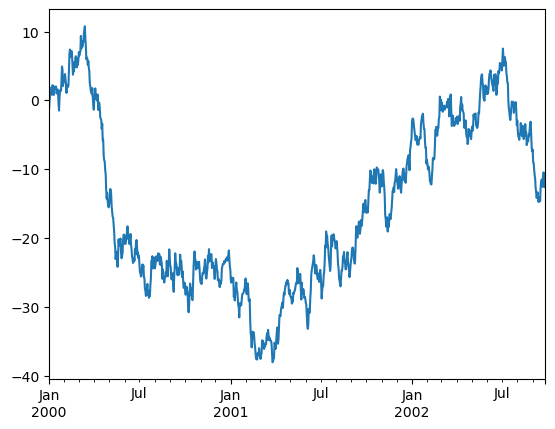

In [110]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot();

In [111]:
plt.show();

<Figure size 640x480 with 0 Axes>

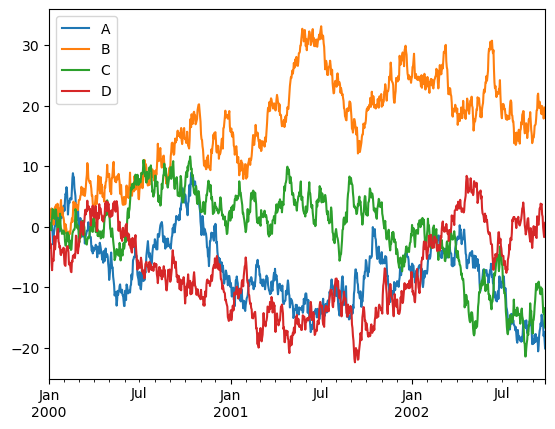

In [114]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc='best');

# Importing and exporting data
---

## CSV

In [121]:
df.to_csv("foo.csv")
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.217103,1.071170,0.361615,-0.630922
1,2000-01-02,0.065901,1.201990,-0.191580,-0.754379
2,2000-01-03,0.031512,1.727440,-0.482239,-2.510968
3,2000-01-04,0.673125,2.302623,0.399015,-3.400594
4,2000-01-05,0.144602,2.593499,-0.566641,-2.911807
...,...,...,...,...,...
995,2002-09-22,-16.164054,18.557504,-13.757566,-0.093706
996,2002-09-23,-18.073104,17.906909,-14.312012,-0.843857
997,2002-09-24,-17.435895,18.178536,-13.434093,-1.706902
998,2002-09-25,-18.808607,19.741707,-16.060915,-0.906588


## HDF5
---

In [127]:
df.to_hdf("foo.h5", "df")
pd.read_hdf("foo.h5", "df")

,A,B,C,D
2000-01-01,0.217103,1.071170,0.361615,-0.630922
2000-01-02,0.065901,1.201990,-0.191580,-0.754379
2000-01-03,0.031512,1.727440,-0.482239,-2.510968
2000-01-04,0.673125,2.302623,0.399015,-3.400594
2000-01-05,0.144602,2.593499,-0.566641,-2.911807
...,...,...,...,...
2002-09-22,-16.164054,18.557504,-13.757566,-0.093706
2002-09-23,-18.073104,17.906909,-14.312012,-0.843857
2002-09-24,-17.435895,18.178536,-13.434093,-1.706902
2002-09-25,-18.808607,19.741707,-16.060915,-0.906588


## Excel
---

In [126]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.217103,1.071170,0.361615,-0.630922
1,2000-01-02,0.065901,1.201990,-0.191580,-0.754379
2,2000-01-03,0.031512,1.727440,-0.482239,-2.510968
3,2000-01-04,0.673125,2.302623,0.399015,-3.400594
4,2000-01-05,0.144602,2.593499,-0.566641,-2.911807
...,...,...,...,...,...
995,2002-09-22,-16.164054,18.557504,-13.757566,-0.093706
996,2002-09-23,-18.073104,17.906909,-14.312012,-0.843857
997,2002-09-24,-17.435895,18.178536,-13.434093,-1.706902
998,2002-09-25,-18.808607,19.741707,-16.060915,-0.906588


# Gotchas
---

In [125]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().